In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 
import ipynb.fs.defs.functions as funcs

pd.set_option('display.max_rows', 1000)

In [2]:
locations_df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200919.txt')
highlighted_stations = pd.read_csv('important_stations.csv')

In [3]:
# read in August 2019 mta data
august_2019_df_list = ['190803', '190810', '190817', '190824', '190831']

In [4]:
aug_2019_df = funcs.combine_dfs_add_time(august_2019_df_list)
aug_2019_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_INT,DAY_STR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935,2019-07-27 00:00:00,5,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939,2019-07-27 04:00:00,5,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,08:00:00,REGULAR,7148326,2418975,2019-07-27 08:00:00,5,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,12:00:00,REGULAR,7148441,2419042,2019-07-27 12:00:00,5,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,16:00:00,REGULAR,7148647,2419101,2019-07-27 16:00:00,5,Saturday


In [5]:
aug_2019_df = funcs.add_entry_and_exit_differences(aug_2019_df)
aug_2019_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_INT,DAY_STR,ENTRIES_DIFF,EXIT_DIFF
31945,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,00:00:00,REGULAR,14868945,16617731,2019-07-27 00:00:00,5,Saturday,0.0,0.0
31946,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,04:00:00,REGULAR,14868945,16617731,2019-07-27 04:00:00,5,Saturday,0.0,0.0
31947,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,08:00:00,REGULAR,14868945,16617731,2019-07-27 08:00:00,5,Saturday,0.0,0.0
31948,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,12:00:00,REGULAR,14868945,16617732,2019-07-27 12:00:00,5,Saturday,0.0,1.0
31949,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,16:00:00,REGULAR,14868945,16617734,2019-07-27 16:00:00,5,Saturday,0.0,2.0


In [6]:
aug_2019_df = funcs.clean_entry_exit_values(aug_2019_df, 3000)
aug_2019_df.head()

You removed 12421 rows in the cleaning


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_INT,DAY_STR,ENTRIES_DIFF,EXIT_DIFF
31945,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,00:00:00,REGULAR,14868945,16617731,2019-07-27 00:00:00,5,Saturday,0.0,0.0
31946,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,04:00:00,REGULAR,14868945,16617731,2019-07-27 04:00:00,5,Saturday,0.0,0.0
31947,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,08:00:00,REGULAR,14868945,16617731,2019-07-27 08:00:00,5,Saturday,0.0,0.0
31948,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,12:00:00,REGULAR,14868945,16617732,2019-07-27 12:00:00,5,Saturday,0.0,1.0
31949,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,16:00:00,REGULAR,14868945,16617734,2019-07-27 16:00:00,5,Saturday,0.0,2.0


In [7]:
aug_2019_totals_per_station = funcs.totals_combined_per_station(aug_2019_df)
aug_2019_totals_per_station.sort_values("COMBINED", ascending=False)

,ENTRIES_DIFF,EXIT_DIFF,COMBINED
STATION,,,
34 ST-PENN STA,4729027.0,4369860.0,9098887.0
GRD CNTRL-42 ST,3982742.0,3539798.0,7522540.0
34 ST-HERALD SQ,3589323.0,3430888.0,7020211.0
TIMES SQ-42 ST,2972993.0,2827218.0,5800211.0
14 ST-UNION SQ,2861936.0,2736963.0,5598899.0
23 ST,3165025.0,2397835.0,5562860.0
FULTON ST,2778077.0,2449023.0,5227100.0
42 ST-PORT AUTH,2745939.0,2282982.0,5028921.0
86 ST,2264155.0,2212989.0,4477144.0


In [8]:
aug_2019_avg_per_station = funcs.avg_combined_per_station(aug_2019_df)
aug_2019_avg_per_station.sort_values("COMBINED", ascending=False)

,ENTRIES_DIFF,EXIT_DIFF,COMBINED
STATION,,,
34 ST-PENN STA,135115.057143,124853.142857,259968.200000
GRD CNTRL-42 ST,113792.628571,101137.085714,214929.714286
34 ST-HERALD SQ,102552.085714,98025.371429,200577.457143
TIMES SQ-42 ST,84942.657143,80777.657143,165720.314286
14 ST-UNION SQ,81769.600000,78198.942857,159968.542857
23 ST,90429.285714,68509.571429,158938.857143
FULTON ST,79373.628571,69972.085714,149345.714286
42 ST-PORT AUTH,78455.400000,65228.057143,143683.457143
86 ST,64690.142857,63228.257143,127918.400000


In [9]:
aug_2019_avg_traffic_per_day_per_station = funcs.avg_per_day_of_week(aug_2019_df)
aug_2019_avg_traffic_per_day_per_station.head()

ENTRIES_DIFF  EXIT_DIFF  COMBINED
STATION DAY_STR                                    
1 AV    Friday         16448.0    18357.8   34805.8
        Monday         14081.4    16142.0   30223.4
        Saturday        6475.0     7613.6   14088.6
        Sunday          4539.8     6077.2   10617.0
        Thursday       16550.4    17914.8   34465.2

In [10]:
aug_2019_avg_traffic_per_day_per_time_per_station = funcs.avg_per_day_of_week_and_time(aug_2019_df)
aug_2019_avg_traffic_per_day_per_time_per_station.head()

ENTRIES_DIFF  EXIT_DIFF  COMBINED
STATION DAY_STR TIME                                       
1 AV    Friday  00:00:00        2328.8     2165.6    4494.4
                04:00:00         306.0      251.6     557.6
                08:00:00         990.8     2329.6    3320.4
                12:00:00        3991.2     4206.6    8197.8
                16:00:00        3660.0     3915.6    7575.6

In [12]:
# clean the highlighted stations
highlighted_stations.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')
highlighted_stations.rename(columns={'stations': 'STATION'}, inplace=True)
highlighted_stations.head()

,STATION,university,tech,rich,total score
0,1 AV,False,True,True,3
1,116 ST-COLUMBIA,True,False,False,4
2,135 ST,True,False,False,4
3,137 ST CITY COL,True,False,False,4
4,14 ST,False,True,True,3


In [13]:
# merge with the aug totals
aug_totals_with_score = pd.merge(aug_2019_totals_per_station, highlighted_stations, on='STATION')
aug_totals_with_score.head()

,STATION,ENTRIES_DIFF,EXIT_DIFF,COMBINED,university,tech,rich,total score
0,34 ST-PENN STA,4729027.0,4369860.0,9098887.0,False,False,True,1
1,GRD CNTRL-42 ST,3982742.0,3539798.0,7522540.0,False,False,True,1
2,34 ST-HERALD SQ,3589323.0,3430888.0,7020211.0,False,False,True,1
3,TIMES SQ-42 ST,2972993.0,2827218.0,5800211.0,False,False,True,1
4,14 ST-UNION SQ,2861936.0,2736963.0,5598899.0,False,False,True,1


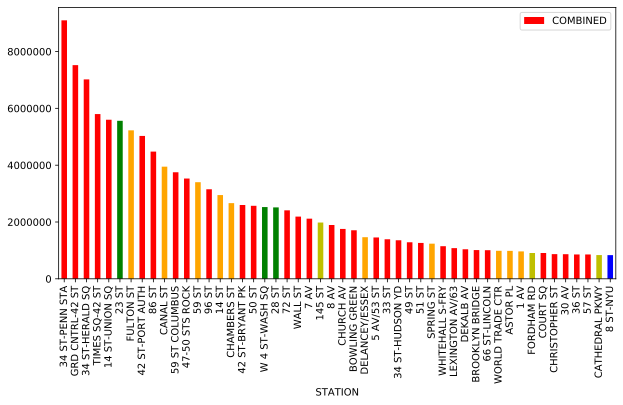

In [15]:
funcs.create_interested_colored_bar_graph(aug_totals_with_score, 50)

In [16]:
aug_totals_with_score_leaders = aug_totals_with_score[aug_totals_with_score["total score"]>=4]
leader_stations = aug_totals_with_score_leaders.head(10)
leader_stations = leader_stations["STATION"]

In [17]:
reset_df = aug_2019_avg_traffic_per_day_per_station.reset_index()
leader_daily_avgs = reset_df[reset_df["STATION"].isin(leader_stations)]
total_in_week = leader_daily_avgs.groupby("STATION")["COMBINED"].sum()
leader_daily_avgs = pd.merge(leader_daily_avgs, total_in_week, on="STATION")
leader_daily_avgs = leader_daily_avgs.sort_values(by=["COMBINED_y"], ascending=False)

In [18]:
monday = np.array(leader_daily_avgs[leader_daily_avgs["DAY_STR"]=="Monday"]["COMBINED_x"])
tuesday = np.array(leader_daily_avgs[leader_daily_avgs["DAY_STR"]=="Tuesday"]["COMBINED_x"])
wednesday = np.array(leader_daily_avgs[leader_daily_avgs["DAY_STR"]=="Wednesday"]["COMBINED_x"])
thursday = np.array(leader_daily_avgs[leader_daily_avgs["DAY_STR"]=="Thursday"]["COMBINED_x"])
friday = np.array(leader_daily_avgs[leader_daily_avgs["DAY_STR"]=="Friday"]["COMBINED_x"])
saturday = np.array(leader_daily_avgs[leader_daily_avgs["DAY_STR"]=="Saturday"]["COMBINED_x"])
sunday = np.array(leader_daily_avgs[leader_daily_avgs["DAY_STR"]=="Sunday"]["COMBINED_x"])
stations = leader_daily_avgs[leader_daily_avgs["DAY_STR"]=="Sunday"]["STATION"]

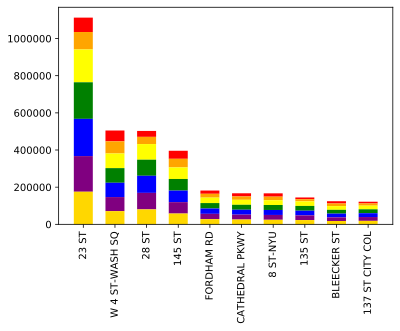

In [19]:
plt.bar(stations, sunday, width=0.6, label='sunday', color='red', bottom=saturday+friday+thursday+wednesday+tuesday+monday)
plt.bar(stations, saturday, width=0.6, label='saturday', color='orange', bottom=friday+thursday+wednesday+tuesday+monday)
plt.bar(stations, friday, width=0.6, label='friday', color='yellow', bottom=thursday+wednesday+tuesday+monday)
plt.bar(stations, thursday, width=0.6, label='thursday', color='green', bottom=wednesday+tuesday+monday)
plt.bar(stations, wednesday, width=0.6, label='wednesday', color='blue', bottom=tuesday+monday)
plt.bar(stations, tuesday, width=0.6, label='tuesday', color='purple', bottom=monday)
plt.bar(stations, monday, width=0.6, label='monday', color='gold')
plt.xticks(rotation=90)
plt.show();

In [ ]:
aug_2019_avg_traffic_per_day_per_station.head(50).reset_index().plot.bar(x='STATION', y='COMBINED', stacked=True, )